In [38]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [39]:

df_cancer = pd.read_csv("cancerFiltered.csv", sep=",")
df_healthy= pd.read_csv("healthyFiltered.csv", sep=",")
paired= pd.read_csv("paired_2sided.csv",sep=",")
paired

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,normality,p,stat,expression
0,0,HIST3H2A,92815.0,NOT,1.008929e-08,44.0,expressed
1,1,LIN7B,64130.0,NOT,2.384960e-01,494.0,not
2,2,LXN,56925.0,NOT,1.725267e-06,142.0,expressed
3,3,CNKSR2,22866.0,ND,1.265880e-08,48.0,expressed
4,4,SCML1,6322.0,NOT,1.601853e-02,388.0,expressed
...,...,...,...,...,...,...,...
17270,17270,ZNF521,25925.0,NaN,8.775508e-06,177.0,expressed
17271,17271,SPINT2,10653.0,NaN,4.778330e-09,31.0,expressed
17272,17272,HAVCR2,84868.0,NaN,3.366814e-09,25.0,expressed
17273,17273,CTD-2116N17.1,0.0,NaN,2.964334e-09,16.0,expressed


In [40]:
df_cancer

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,19641,ZNF521,25925,37.32,76.71,59.97,84.04,14.24,202.66,435.55,...,22.59,33.78,148.09,106.63,297.17,22.26,25.72,106.63,71.00,37.05
17271,19642,SPINT2,10653,56265.94,3901.01,16843.62,12244.81,37901.36,8479.89,9606.86,...,18052.61,15392.14,20030.74,20593.91,9808.75,11189.60,10733.74,10014.87,6983.79,23169.48
17272,19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,...,150.17,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04
17273,19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,...,8.85,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86


In [41]:
df_healthy.iloc[:,3:]

,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,54.33,15.56,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,175.07,147.06,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,603.67,555.41,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,28.04,39.22,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,120.10,239.52,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,215.77,148.09,83.45,232.94,167.90,80.01,161.02,104.42,81.14,113.56,...,145.02,202.66,111.99,371.22,154.42,289.02,32.59,191.67,204.07,88.26
17271,6792.79,5441.30,5831.91,5329.30,5711.87,6164.49,8134.41,6516.03,8598.28,5633.22,...,3955.48,4869.99,6935.54,4836.35,7230.10,6250.56,6840.04,5292.48,3928.15,7130.55
17272,423.61,529.06,660.68,620.67,518.15,848.22,366.09,1073.91,363.56,366.09,...,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
17273,0.00,0.00,0.99,3.59,2.23,3.35,0.00,7.34,1.41,0.00,...,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


In [42]:
df_cancer['average_GE']=df_cancer.iloc[:,3:].mean(axis=1)
df_healthy['average_GE']=df_healthy.iloc[:,3:].mean(axis=1)

df_cancer['average_GE']

0          286.4534
1          187.4482
2          490.3438
3           14.0076
4          138.4650
            ...    
17270       80.3896
17271    13603.9096
17272      203.5698
17273       11.5644
17274      231.5940
Name: average_GE, Length: 17275, dtype: float64

In [43]:
df_healthy['average_GE']

0          53.6660
1         171.9386
2         866.3358
3          41.5340
4         167.0196
           ...    
17270     163.5038
17271    6091.8848
17272     512.2180
17273       1.9818
17274      50.2584
Name: average_GE, Length: 17275, dtype: float64

In [44]:
FC = pd.DataFrame()
FC['Hugo_Symbol'] = df_cancer['Hugo_Symbol']
FC['Entrez_Gene_Id'] = df_cancer['Entrez_Gene_Id']
FC

,Hugo_Symbol,Entrez_Gene_Id
0,HIST3H2A,92815
1,LIN7B,64130
2,LXN,56925
3,CNKSR2,22866
4,SCML1,6322
...,...,...
17270,ZNF521,25925
17271,SPINT2,10653
17272,HAVCR2,84868
17273,CTD-2116N17.1,0


In [45]:
FC['FC']=df_cancer['average_GE']/df_healthy['average_GE']
FC

,Hugo_Symbol,Entrez_Gene_Id,FC
0,HIST3H2A,92815,5.337707
1,LIN7B,64130,1.090204
2,LXN,56925,0.565997
3,CNKSR2,22866,0.337256
4,SCML1,6322,0.829034
...,...,...,...
17270,ZNF521,25925,0.491668
17271,SPINT2,10653,2.233120
17272,HAVCR2,84868,0.397428
17273,CTD-2116N17.1,0,5.835301


In [46]:
FC['log2FC']=np.log2(FC['FC'])
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC
0,HIST3H2A,92815,5.337707,2.416220
1,LIN7B,64130,1.090204,0.124599
2,LXN,56925,0.565997,-0.821133
3,CNKSR2,22866,0.337256,-1.568083
4,SCML1,6322,0.829034,-0.270496
...,...,...,...,...
17270,ZNF521,25925,0.491668,-1.024243
17271,SPINT2,10653,2.233120,1.159061
17272,HAVCR2,84868,0.397428,-1.331234
17273,CTD-2116N17.1,0,5.835301,2.544807


In [47]:
FC['ABS']=FC['log2FC'].abs()
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS
0,HIST3H2A,92815,5.337707,2.416220,2.416220
1,LIN7B,64130,1.090204,0.124599,0.124599
2,LXN,56925,0.565997,-0.821133,0.821133
3,CNKSR2,22866,0.337256,-1.568083,1.568083
4,SCML1,6322,0.829034,-0.270496,0.270496
...,...,...,...,...,...
17270,ZNF521,25925,0.491668,-1.024243,1.024243
17271,SPINT2,10653,2.233120,1.159061,1.159061
17272,HAVCR2,84868,0.397428,-1.331234,1.331234
17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807


In [48]:
Threshold=math.log(1.5,2)
Threshold

0.5849625007211562

In [49]:
FC.loc[FC['ABS'] < Threshold, 'over expressed'] = 0 
FC.loc[FC['ABS'] >= Threshold, 'over expressed'] = 1
FC

,Hugo_Symbol,Entrez_Gene_Id,FC,log2FC,ABS,over expressed
0,HIST3H2A,92815,5.337707,2.416220,2.416220,1.0
1,LIN7B,64130,1.090204,0.124599,0.124599,0.0
2,LXN,56925,0.565997,-0.821133,0.821133,1.0
3,CNKSR2,22866,0.337256,-1.568083,1.568083,1.0
4,SCML1,6322,0.829034,-0.270496,0.270496,0.0
...,...,...,...,...,...,...
17270,ZNF521,25925,0.491668,-1.024243,1.024243,1.0
17271,SPINT2,10653,2.233120,1.159061,1.159061,1.0
17272,HAVCR2,84868,0.397428,-1.331234,1.331234,1.0
17273,CTD-2116N17.1,0,5.835301,2.544807,2.544807,1.0


In [50]:
arr=np.array(FC['over expressed'])

In [51]:
FC['over expressed'].sum()

9135.0

In [52]:
for i in range(len(arr)):
    print(int(arr[i]))

1
0
1
1
0
0
0
1
1
1
0
1
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
1
0
1
1
1
1
0
1
0
0
1
1
0
0
1
1
0
1
1
1
0
0
0
0
1
0
0
1
0
1
1
1
0
1
1
1
0
0
0
1
1
1
1
1
0
1
0
0
1
1
0
1
0
1
0
0
1
1
1
0
1
1
0
1
0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
1
1
0
0
1
0
1
1
1
1
1
0
0
1
0
0
1
1
1
0
1
0
1
0
1
1
0
0
0
0
0
1
0
0
0
1
0
1
1
1
1
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
1
0
0
1
0
1
0
1
1
1
0
1
0
0
1
0
1
1
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
1
1
0
1
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
0
1
0
1
0
0
1
0
0
0
1
0
1
0
1
1
0
0
1
1
0
1
1
0
1
1
0
1
0
0
1
1
0
1
0
1
0
0
0
1
0
1
0
1
1
1
0
0
1
0
1
0
0
0
0
0
1
1
0
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
1
1
1
0
0
0
1
0
1
1
0
0
1
1
1
1
1
0
0
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
0
1
0
0
1
1
1
1
1
0
1
0
1
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
1
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
0
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
0
1
1
1
0
0
0
0
0
1
0
1
1
0
1
0
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
0
1
0
1
0
1
0
1
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
1


1
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
0
1
1
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
1
1
1
0
1
1
1
1
0
1
0
0
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
0
0
0
0
1
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
0
1
1
0
1
0
0
1
0
0
1
0
1
0
0
0
1
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
0
0
0
1
1
0
1
1
0
1
0
1
0
0
1
1
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
1
0
0
0
0
1
0
0
1
1
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
0
0
0
0
0
0
1
0
1
1
1
1
0
1
0
0
1
1
1
0
0
0
0
0
1
1
1
0
1
1
0
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
0
0
0
1
0
1
0
1
1
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
0
0
1
1
0
0
0
1
0
1
1
1
1
0
0
1
0
0
0
1
1
0
0
1
0
1
0
1
1
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
1
0
1
0
1
0
0
1
1
1
0
1
0
1
1
0
1
0
1
0
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
1
1
1
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
0
0
0
0
1
1
0
0
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
0
1
0
1
0
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
0
1
0
1
0
0
0
1
1
0
1
0
1
1


1
1
0
0
0
0
1
1
1
0
0
1
1
1
0
0
1
0
1
0
1
1
1
1
0
1
0
0
1
1
1
1
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
1
1
1
0
1
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
1
1
0
1
0
0
0
0
1
1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
0
0
1
1
1
0
1
1
1
1
0
1
0
1
0
1
0
0
0
0
1
1
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
0
0
0
0
1
0
0
1
0
1
1
1
1
1
0
1
0
0
0
0
0
1
1
1
0
0
0
0
1
1
1
0
1
0
0
1
1
0
1
0
1
0
0
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
0
0
0
0
0
1
1
0
0
1
0
1
1
0
1
0
0
0
1
0
0
1
0
1
0
1
0
1
1
1
1
0
0
0
1
0
0
1
0
1
1
0
0
1
1
1
0
0
0
0
1
0
0
1
0
1
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
0
1
1
0
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
1
1
0
0
1
1
0
1
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
0
0
1
1
0
1
1
0
1
1
0
0
0
1
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
0
0
1
1
1
0
1
0
1
0
1
1
0
1
0
0
1
1
1
0
1
0
1
1
1
1
1
0
1
0
0
1
1
0
0
1
0
1
1
1
0
1
1
1
0
0
1
0
0
1
0
1
0
1
0
0
0
0
1
1
0
1
1
0
1
0
1
0
1
0
0
0
1


In [53]:
cc=['r']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='g'
    elif val>=0:
        cc[n]='b'

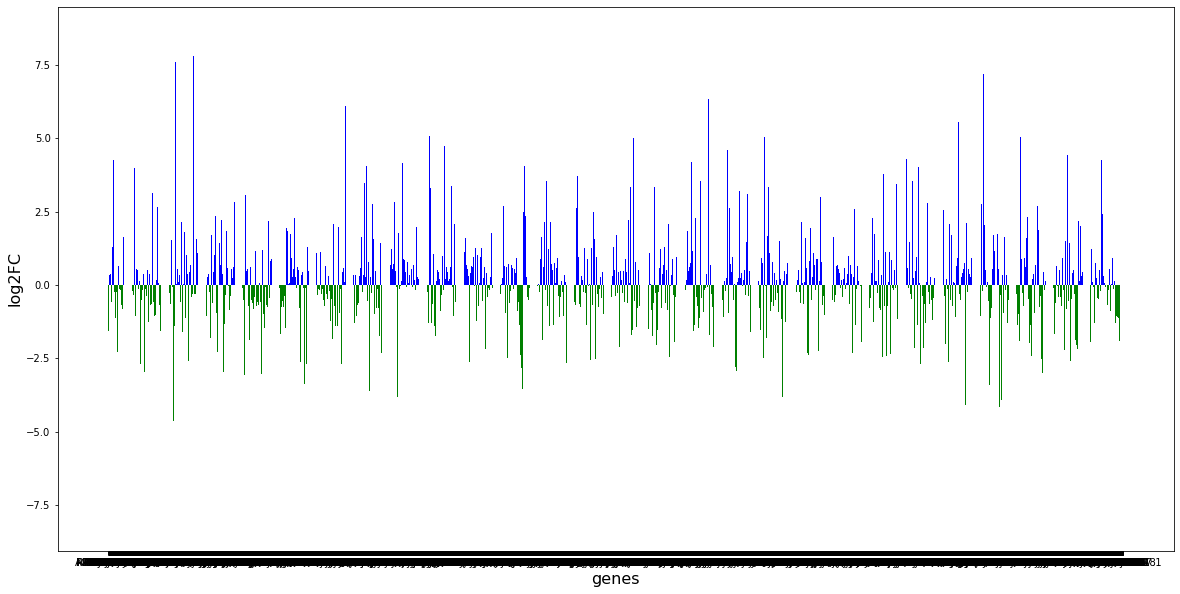

In [54]:
plt.figure(figsize=(20,10))
plt.bar(FC["Hugo_Symbol"],FC['log2FC'],color=cc)
plt.xlabel('genes', fontsize=16)
plt.ylabel('log2FC', fontsize=16)
plt.show()

In [55]:
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='r'
    elif val>0:
        cc[n]='b'

In [56]:
paired['p'].min()

7.551804758280675e-10

In [57]:
FC['segnificance']=-np.log10(paired['p'])

In [58]:
FC['segnificance']

0        7.996139
1        0.622519
2        5.763144
3        7.897608
4        1.795377
           ...   
17270    5.056728
17271    8.320724
17272    8.472781
17273    8.528073
17274    7.272511
Name: segnificance, Length: 17275, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

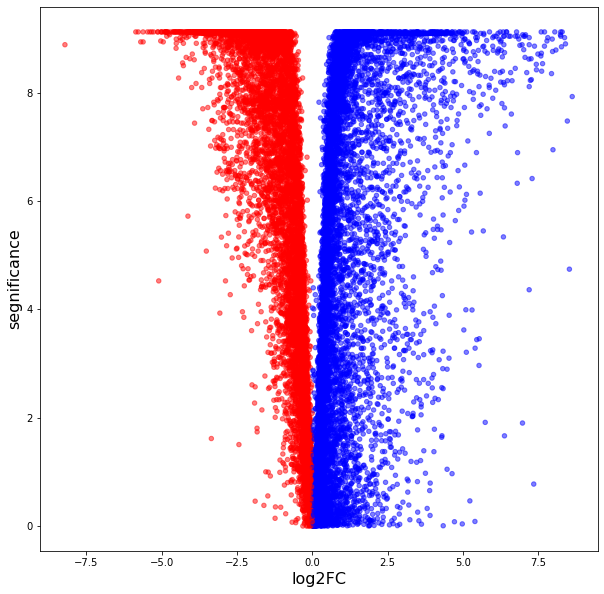

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance', fontsize=16)
plt.show


In [60]:
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='r'
    elif val>0:
        cc[n]='b'

for n,val in enumerate(FC['over expressed']):
    if val==0:
        cc[n]='gray'
    

<function matplotlib.pyplot.show(close=None, block=None)>

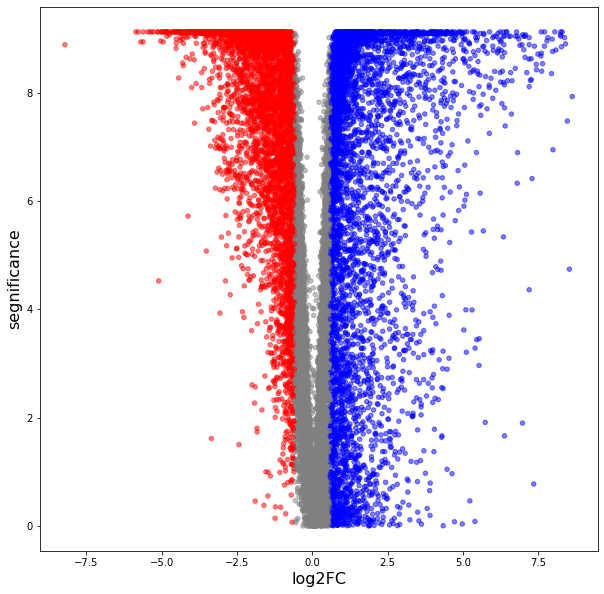

In [61]:

plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance', fontsize=16)
plt.show


In [62]:
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='r'
    elif val>0:
        cc[n]='b'
for n,val in enumerate(FC['segnificance']):
    if val<-math.log(5/100,10):
        cc[n]='gray'
    

<function matplotlib.pyplot.show(close=None, block=None)>

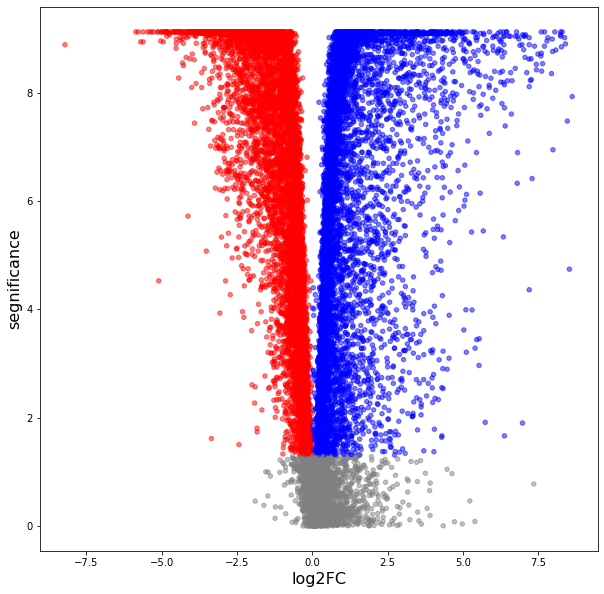

In [63]:

plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance', fontsize=16)
plt.show


In [64]:
cc=['g']*len(FC['log2FC'])
for n,val in enumerate(FC['log2FC']):
    if val<0:
        cc[n]='r'
    elif val>0:
        cc[n]='b'
for n,val in enumerate(FC['segnificance']):
    if val<-math.log(5/100,10):
        cc[n]='gray'
for n,val in enumerate(FC['over expressed']):
    if val==0:
        cc[n]='gray'

<function matplotlib.pyplot.show(close=None, block=None)>

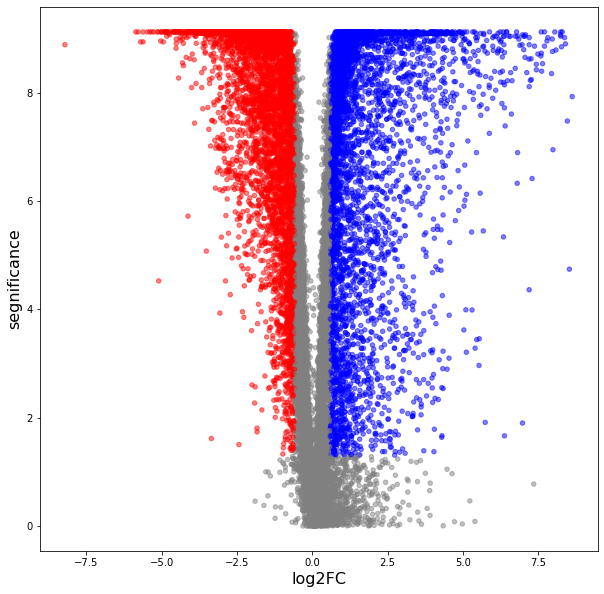

In [65]:

plt.figure(figsize=(10,10))
plt.scatter(FC['log2FC'], FC['segnificance'], c =cc, alpha=0.5, s=20)
plt.xlabel('log2FC', fontsize=16)
plt.ylabel('segnificance', fontsize=16)
plt.show